In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json
from pprint import pprint as pp
from config import iihs_url, iihs_key

In [2]:
d_i_cnt = pd.read_csv('New Resources/death_injury_counts.csv')
d_i_cnt.head()

,Year,Persons Killed,Persons Injured
0,1978,1224,65749
1,1979,1162,60405
2,1980,1191,56131
3,1981,1056,56801
4,1982,908,53366


Text(0,0.5,'Persons Killed')

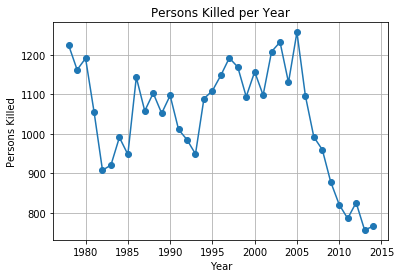

In [3]:
plt.plot(d_i_cnt['Year'], d_i_cnt['Persons Killed'], marker='o')
plt.grid()

plt.title('Persons Killed per Year')
plt.xlabel('Year')
plt.ylabel('Persons Killed')

Text(0,0.5,'Persons Injured')

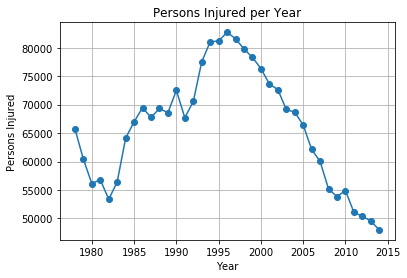

In [4]:
plt.plot(d_i_cnt['Year'], d_i_cnt['Persons Injured'], marker='o')
plt.grid()

plt.title('Persons Injured per Year')
plt.xlabel('Year')
plt.ylabel('Persons Injured')

In [5]:
d_i_rate = pd.read_csv('New Resources/death_injury_rates.csv')
d_i_rate.head()

,Year,Death Rate,Injury Rate
0,1978,3.5,193.2
1,1979,3.4,178.1
2,1980,3.5,168.8
3,1981,3.0,166.6
4,1982,2.6,155.1


Text(0,0.5,'Death Rate')

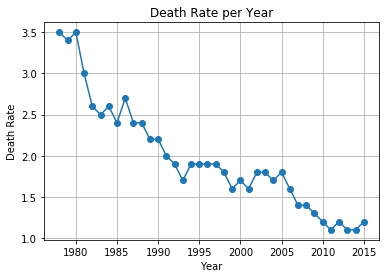

In [6]:
plt.plot(d_i_rate['Year'], d_i_rate['Death Rate'], marker='o')
plt.grid()

plt.title('Death Rate per Year')
plt.xlabel('Year')
plt.ylabel('Death Rate')

Text(0,0.5,'Injury Rate')

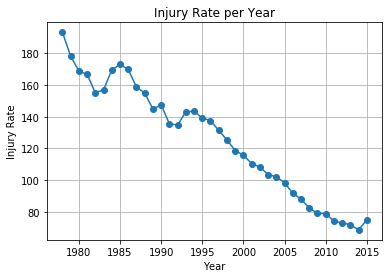

In [7]:
plt.plot(d_i_rate['Year'], d_i_rate['Injury Rate'], marker='o')
plt.grid()

plt.title('Injury Rate per Year')
plt.xlabel('Year')
plt.ylabel('Injury Rate')

In [8]:
old = pd.read_csv('New Resources/old.csv')
old.head()

,Year,Fatal Crashes,Personal Injury Crashes,Persons Killed,Persons Injured
0,2005,331,"11,588",377,"17,873"
1,2006,276,"11,235",312,"17,173"
2,2007,281,"11,157",320,"16,875"
3,2008,254,"10,563",288,"15,755"
4,2009,256,"10,462",290,"15,718"


In [9]:
old = old.rename(index=str, columns={"Fatal Crashes": "Old_Fatal Crashes",
                                     "Personal Injury": "Old_Personal Injury",
                                     "Crashes": "Old_Crashes",
                                     "Persons Killed": "Old_Persons Killed",
                                     "Persons Injured": "Old_Persons Injured"})
old.head()

,Year,Old_Fatal Crashes,Personal Injury Crashes,Old_Persons Killed,Old_Persons Injured
0,2005,331,"11,588",377,"17,873"
1,2006,276,"11,235",312,"17,173"
2,2007,281,"11,157",320,"16,875"
3,2008,254,"10,563",288,"15,755"
4,2009,256,"10,462",290,"15,718"


In [10]:
yng = pd.read_csv('New Resources/young.csv')
yng.head()

,Year,Fatal Crashes,Personal Injury Crashes,Persons Killed,Persons Injured
0,2005,283,"14,316",322,"22,541"
1,2006,260,"13,737",307,"21,527"
2,2007,204,"12,851",226,"20,032"
3,2008,181,"11,587",225,"17,971"
4,2009,170,"11,384",189,"17,554"


In [11]:
yng = yng.rename(index=str, columns={"Fatal Crashes": "Young_Fatal Crashes",
                                     "Personal Injury": "Young_Personal Injury",
                                     "Crashes": "Young_Crashes",
                                     "Persons Killed": "Young_Persons Killed",
                                     "Persons Injured": "Young_Persons Injured"})
yng.head()

,Year,Young_Fatal Crashes,Personal Injury Crashes,Young_Persons Killed,Young_Persons Injured
0,2005,283,"14,316",322,"22,541"
1,2006,260,"13,737",307,"21,527"
2,2007,204,"12,851",226,"20,032"
3,2008,181,"11,587",225,"17,971"
4,2009,170,"11,384",189,"17,554"


In [12]:
yng_old = pd.merge(yng, old, on='Year')
yng_old

,Year,Young_Fatal Crashes,Personal Injury Crashes_x,Young_Persons Killed,Young_Persons Injured,Old_Fatal Crashes,Personal Injury Crashes_y,Old_Persons Killed,Old_Persons Injured
0,2005,283,"14,316",322,"22,541",331,"11,588",377,"17,873"
1,2006,260,"13,737",307,"21,527",276,"11,235",312,"17,173"
2,2007,204,"12,851",226,"20,032",281,"11,157",320,"16,875"
3,2008,181,"11,587",225,"17,971",254,"10,563",288,"15,755"
4,2009,170,"11,384",189,"17,554",256,"10,462",290,"15,718"
5,2010,140,"11,183",149,"17,279",270,"11,000",284,"16,509"
6,2011,149,"9,911",174,"15,198",225,"10,783",246,"15,928"
7,2012,153,"9,841",169,"15,180",230,"10,718",252,"15,855"
8,2013,136,"9,143",150,"14,070",234,"10,789",254,"15,964"
9,2014,118,"8,647",139,"13,081",251,"10,903",280,"16,057"


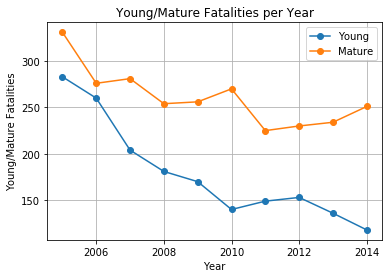

In [24]:
Young, = plt.plot(yng_old['Year'], yng_old['Young_Fatal Crashes'], marker='o', label='Young')
Mature, = plt.plot(yng_old['Year'], yng_old['Old_Fatal Crashes'], marker='o', label='Mature')
plt.grid()

plt.title('Young/Mature Fatalities per Year')
plt.xlabel('Year')
plt.ylabel('Young/Mature Fatalities')
plt.legend(handles=[Young, Mature], loc="best")

In [25]:
spd = pd.read_csv('New Resources/speed.csv')
spd.head()

,Year,Fatal Crashes,Personal Injury Crashes,Persons Killed,Persons Injured
0,2005,451,"10,128",510,"15,150"
1,2006,397,"9,240",457,"13,940"
2,2007,370,"9,886",410,"14,509"
3,2008,368,"9,079",426,"13,240"
4,2009,321,"8,372",366,"12,430"


Text(0,0.5,'Speed Fatalities')

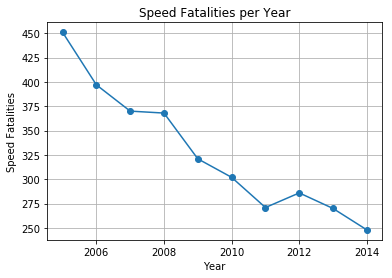

In [15]:
plt.plot(spd['Year'], spd['Fatal Crashes'], marker='o')
plt.grid()

plt.title('Speed Fatalities per Year')
plt.xlabel('Year')
plt.ylabel('Speed Fatalities')

In [16]:
alc = pd.read_csv('New Resources/alcohol.csv')
alc.head()

,Year,Fatal Crashes,Personal Injury Crashes,Persons Killed,Persons Injured
0,2005,266,"3,787",289,"5,602"
1,2006,256,"3,783",263,"5,549"
2,2007,237,"3,623",257,"5,350"
3,2008,252,"3,369",279,"4,913"
4,2009,248,"3,384",281,"4,862"


Text(0,0.5,'Alcohol Fatalities')

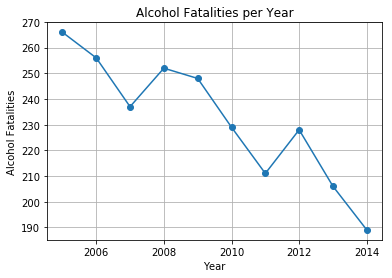

In [17]:
plt.plot(alc['Year'], alc['Fatal Crashes'], marker='o')
plt.grid()

plt.title('Alcohol Fatalities per Year')
plt.xlabel('Year')
plt.ylabel('Alcohol Fatalities')

In [18]:
mtrcycle = pd.read_csv('New Resources/motorcycle.csv')
mtrcycle.head()

,Year,Fatal Crashes,Personal Injury Crashes,Persons Killed,Persons Injured
0,2005,86,"1,681",89,"1,975"
1,2006,91,"1,803",94,"2,091"
2,2007,89,"1,856",93,"2,177"
3,2008,103,"1,950",108,"2,279"
4,2009,82,"1,842",84,"2,178"


Text(0,0.5,'Motorcycle Fatalities')

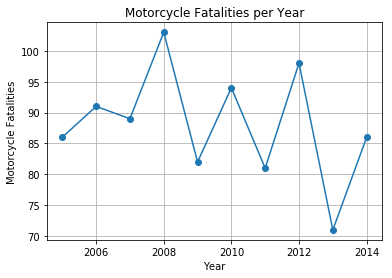

In [19]:
plt.plot(mtrcycle['Year'], mtrcycle['Fatal Crashes'], marker='o')
plt.grid()

plt.title('Motorcycle Fatalities per Year')
plt.xlabel('Year')
plt.ylabel('Motorcycle Fatalities')